# Laboratorium nr 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Skalowanie danych
Proszę pamiętać, aby zawsze estymować parametry skalowania (średnia i wariancja) na zbiorze treningowym, a nie na całym zbiorze danych. W przeciwym razie, zbierając statystyki z całego zbioru danych, "przenosimy" część informacji ze zbioru testowego/walidacyjnego do treningowego, co jest błędem metodologicznym.

### Zadanie nr 1 (1 punkt)
Załaduj dane _breast_cancer_, a następnie naucz model SVC na danych (tylko zmienne niezależne!) zestandaryzowanych i niezestandaryzowanych. Użyj w tym celu StandardScalera. Czy jest jakaś różnica w predykcji?

In [3]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    matthews_corrcoef,
    cohen_kappa_score,
    balanced_accuracy_score,
)
import numpy as np


cancer = load_breast_cancer()
# get the data
X = cancer.data
y = cancer.target


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Inicjalizacja modelu
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Można zmienić kernel na 'linear', 'poly', itp.

# Nauczanie
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9736842105263158
Precision: 0.9741062479117941
Recall: 0.9692460317460317
F1 Score: 0.9715828832571666
Balanced Accuracy: 0.9692460317460317
Matthews Correlation Coefficient: 0.9433397594898876
Cohen's Kappa: 0.9431704885343968
Confusion Matrix:
 [[40  2]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [4]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    matthews_corrcoef,
    cohen_kappa_score,
    balanced_accuracy_score,
)
import numpy as np



cancer = load_breast_cancer()
# get the data
X = cancer.data
y = cancer.target


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)



# Inicjalizacja modelu
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Można zmienić kernel na 'linear', 'poly', itp.

# Nauczanie
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.8947368421052632
Precision: 0.9285714285714286
Recall: 0.8571428571428572
F1 Score: 0.8782051282051282
Balanced Accuracy: 0.8571428571428572
Matthews Correlation Coefficient: 0.7824607964359516
Cohen's Kappa: 0.759493670886076
Confusion Matrix:
 [[30 12]
 [ 0 72]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        42
           1       0.86      1.00      0.92        72

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114



In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Załaduj dane
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model na danych niezestandaryzowanych
model_raw = SVC()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model na danych zestandaryzowanych
model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Porównanie dokładności
print("Dokładność bez standaryzacji:", acc_raw)
print("Dokładność ze standaryzacją:", acc_scaled)


Dokładność bez standaryzacji: 0.9473684210526315
Dokładność ze standaryzacją: 0.9824561403508771


## Stratified K fold
Wyobraź sobie, że masz torbę pełną kolorowych kulek: 90 czerwonych kulek i 10 niebieskich. Jeśli podzielisz kulki losowo na 5 grup, może się zdarzyć, że w niektórych grupach w ogóle nie będzie niebieskich kulek! Ale jeśli podzielisz kulki uważnie, tak aby w każdej grupie było około 90% czerwonych i 10% niebieskich kulek — tak jak w oryginalnej torbie — wtedy proporcje zostaną zachowane. Właśnie to robi *Stratified K-Fold*! Zachowuje oryginalny rozkład klas w każdym foldzie (podziale). To jest szczególnie ważne, gdy dane są niezbalansowane.

## Metryki
Do oceny jakości modelu używamy następujących metryk:
1. Accuracy mierzy procent poprawnych predykcji w stosunku do wszystkich predykcji.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN},
$$ gdzie:
- TP (True Positive) – poprawnie przewidziane pozytywne przypadki
- TN (True Negative) – poprawnie przewidziane negatywne przypadki
- FP (False Positive) – błędnie przewidziane pozytywne przypadki
- FN (False Negative) – błędnie przewidziane negatywne przypadki
2. Precision mierzy, jaki procent przewidywanych jako pozytywne przykładów faktycznie jest pozytywny.
$$
\text{Precision} = \frac{TP}{TP + FP}.
$$
3. Recall mierzy, jaki procent rzeczywistych pozytywnych przypadków został poprawnie wykryty przez model.
$$
\text{Recall} = \frac{TP}{TP + FN}.
$$

4. F1-score jest średnią harmoniczną precision i recall.
$$
\text{F1\ Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}.
$$

### Zadanie nr 2 (5 punktów)
Instrukcje:
1. Załaduj zbiór danych Iris.
2. Sztucznie zaburz balans klas:
    - Nie wyrzucaj danych z jednej klasy.
    - Z dwóch pozostałych klas zostaw tylko 30% próbek.

Użyj dwóch metod:
- KFold (zwykły podział).
- StratifiedKFold (podział ze stratfikacją).

Następnie dla każdej metody:
1. Przeprowadź walidację krzyżową (5-fold) z użyciem regresji logistycznej.
2. Wydrukuj rozkład klas w każdym foldzie.
3. Wydrukuj dla każdego folda:
    - Dokładność klasyfikacji (accuracy).
    - Precision.
    - Recall.
    - F1 score.

In [6]:
from sklearn import datasets
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [18]:
from sklearn import datasets
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

# Załaduj zbiór danych Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Zidentyfikuj unikalne klasy i ich liczebność
class_counts = Counter(y)
print("Oryginalna liczebność klas:", class_counts)

# Wybierz klasę, którą chcesz pozostawić w całości
# Na przykład, pozostawiamy klasę 0 (Setosa)
full_class = 0
reduced_classes = [cls for cls in class_counts if cls != full_class]

# Inicjalizuj listę indeksów do zachowania
indices_to_keep = []

# Dodaj wszystkie indeksy klasy pełnej
indices_to_keep.extend(np.where(y == full_class)[0])




# Dla pozostałych klas, zachowaj tylko 30% próbek
for cls in reduced_classes:
    cls_indices = np.where(y == cls)[0]
    n_samples = int(0.2 * len(cls_indices))
    # Ustal losowość dla powtarzalności wyników
    np.random.seed(42)
    selected_indices = np.random.choice(cls_indices, n_samples, replace=False)
    indices_to_keep.extend(selected_indices)

# Posortuj indeksy
indices_to_keep = sorted(indices_to_keep)

# Utwórz nowy zbiór danych z wybranymi próbkami
X_imbalanced = X[indices_to_keep]
y_imbalanced = y[indices_to_keep]

# Sprawdź nową liczebność klas
new_class_counts = Counter(y_imbalanced)
print("Nowa liczebność klas:", new_class_counts)


Oryginalna liczebność klas: Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})
Nowa liczebność klas: Counter({np.int64(0): 50, np.int64(1): 10, np.int64(2): 10})


In [19]:



def evaluate_model(cv, X, y, method_name):
    print(f"\n{method_name}:")
    fold = 1
    accs, precs, recs, f1s = [], [], [], []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LogisticRegression(max_iter=100)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        accs.append(acc)
        precs.append(prec)
        recs.append(rec)
        f1s.append(f1)

        print(f"Fold {fold}:")
        print(f"  Rozkład klas w zbiorze testowym: {Counter(y_test)}")
        print(f"  Accuracy: {acc:.4f}")
        print(f"  Precision: {prec:.4f}")
        print(f"  Recall: {rec:.4f}")
        print(f"  F1 Score: {f1:.4f}\n")
        fold += 1

    print(f"{method_name} - Średnie metryki:")
    print(f"  Accuracy: {np.mean(accs):.4f}")
    print(f"  Precision: {np.mean(precs):.4f}")
    print(f"  Recall: {np.mean(recs):.4f}")
    print(f"  F1 Score: {np.mean(f1s):.4f}")






# Użycie KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluate_model(kf, X_imbalanced, y_imbalanced, "KFold")

print()
print("--------------------------------------")
print()

# Użycie StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
evaluate_model(skf, X_imbalanced, y_imbalanced, "StratifiedKFold")




KFold:
Fold 1:
  Rozkład klas w zbiorze testowym: Counter({np.int64(0): 12, np.int64(1): 1, np.int64(2): 1})
  Accuracy: 0.9286
  Precision: 0.5000
  Recall: 0.6667
  F1 Score: 0.5556

Fold 2:
  Rozkład klas w zbiorze testowym: Counter({np.int64(0): 10, np.int64(1): 3, np.int64(2): 1})
  Accuracy: 0.9286
  Precision: 0.5833
  Recall: 0.6667
  F1 Score: 0.6190

Fold 3:
  Rozkład klas w zbiorze testowym: Counter({np.int64(0): 11, np.int64(1): 3})
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Fold 4:
  Rozkład klas w zbiorze testowym: Counter({np.int64(0): 8, np.int64(2): 5, np.int64(1): 1})
  Accuracy: 0.8571
  Precision: 0.6296
  Recall: 0.6000
  F1 Score: 0.6100

Fold 5:
  Rozkład klas w zbiorze testowym: Counter({np.int64(0): 9, np.int64(2): 3, np.int64(1): 2})
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

KFold - Średnie metryki:
  Accuracy: 0.9429
  Precision: 0.7426
  Recall: 0.7867
  F1 Score: 0.7569

-------------------

## Krzywa ROC i AUC

**ROC (Receiver Operating Characteristic curve)** to wykres pokazujący zależność pomiędzy:

- **True Positive Rate (TPR)** — czyli czułość (recall)
- **False Positive Rate (FPR)** — odsetek fałszywych pozytywów

dla różnych progów decyzyjnych.

---

### Wzory:

**True Positive Rate (TPR):**

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

**False Positive Rate (FPR):**

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

Gdzie:
- **TP** (True Positive) — prawidłowo przewidziane pozytywne przypadki
- **FP** (False Positive) — błędnie przewidziane pozytywne przypadki
- **FN** (False Negative) — błędnie przewidziane negatywne przypadki
- **TN** (True Negative) — prawidłowo przewidziane negatywne przypadki

---

## Co to jest AUC?

**AUC (Area Under the Curve)** to **pole pod krzywą ROC**.

- AUC = 1.0 oznacza idealnego klasyfikatora.
- AUC = 0.5 oznacza losowe zgadywanie.
- Im wyższe AUC, tym lepsza jakość klasyfikatora.

---

## Dlaczego używamy ROC i AUC?

- Są **niezależne od konkretnego progu** decyzyjnego.
- Bardzo przydatne przy **niezbalansowanych danych**, gdy accuracy może wprowadzać w błąd.
- Pozwalają ocenić, jak dobrze klasyfikator odróżnia pozytywne i negatywne przykłady.


### Zadanie 3 (4 punkty)
1. Załaduj zbiór danych Iris.
2. Zrób klasyfikację tylko dla dwóch klas (np. klasa 0 vs. reszta).
3. Podziel dane na zbiór treningowy i testowy.
4. Zbuduj Pipeline, składający się z obiektów:
    - StandardScaler (skalowanie)
    - LogisticRegression (regresja logistyczna jako klasyfikator)
    - Przy pomocy GridSearchCV znajdź najlepsze parametry dla regresji logistycznej (C, penalty).
5. Oceń wyniki na zbiorze testowym.
6. Narysuj krzywą ROC i podaj AUC (Area Under Curve).

{'C': np.float64(215.44346900318823), 'penalty': 'l2'}


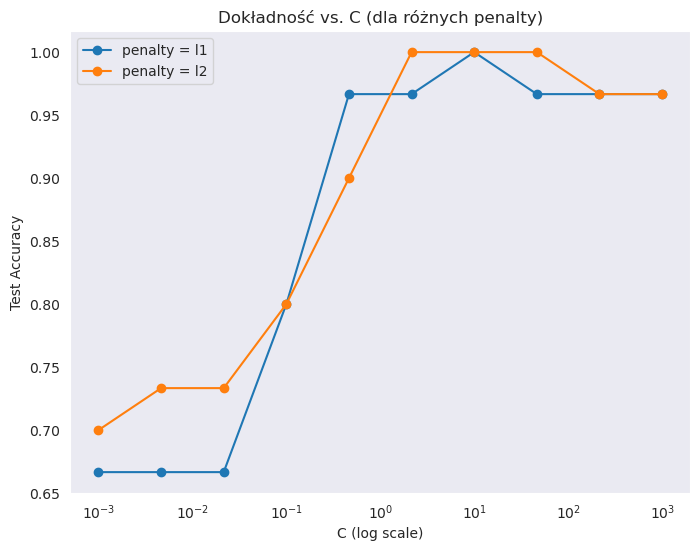

In [40]:
# Do budowy pipeline'u. Żeby zobaczyć, jak go używać, sprawdź dokumentację.
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Wczytanie danych
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)
iris_df['is_virginica'] = (iris_df['species'] == 'virginica').astype(int)

# 2. Wybór jednej cechy
X = iris_df.drop(columns=['is_virginica', 'species']).values
y = iris_df['is_virginica'].values

# 3. Podział danych
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



# 4. GridSearch po C i penalty
param_grid = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2']
}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

# 5. Wykres: Dokładność vs C
test_scores = []
for C in param_grid['C']:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)








print(grid.best_params_)



penalties = param_grid['penalty']
C_values = param_grid['C']

plt.figure(figsize=(8, 6))

for penalty in penalties:
    scores = []
    for C in C_values:
        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear')
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)

    plt.plot(C_values, scores, marker='o', label=f'penalty = {penalty}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Dokładność vs. C (dla różnych penalty)')
plt.grid()
plt.legend()
plt.show()




Najlepsze parametry: {'logreg__C': np.float64(0.001), 'logreg__penalty': 'l2'}
Dokładność na zbiorze testowym: 1.0
AUC: 1.0


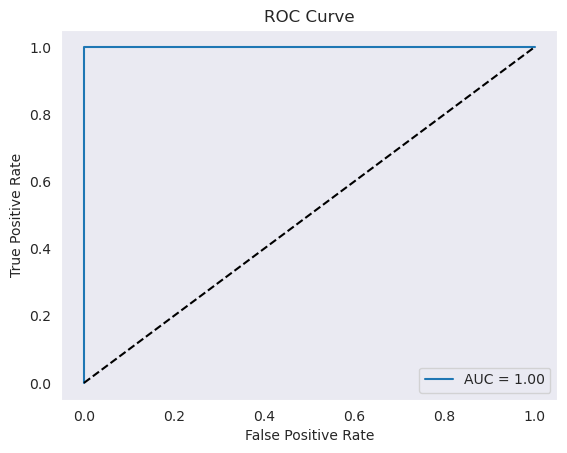

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Załaduj dane
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # 2. Klasa 0 vs reszta (binary classification)

# 3. Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=200))
])

# GridSearchCV dla C i penalty
param_grid = {
    'logreg__C': np.logspace(-3, 3, 10),
    'logreg__penalty': ['l1', 'l2']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 5. Ocena na zbiorze testowym
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_score)

print("Najlepsze parametry:", grid.best_params_)
print("Dokładność na zbiorze testowym:", acc)
print("AUC:", auc)

# 6. Krzywa ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()
